In [2]:
#importing required libraries
import pandas as pd
import numpy as np

#loading csv file into Pandas dataframe
filepath = "./owid-covid-data.csv"
covid_df = pd.read_csv(filepath)
covid_df.shape

(233516, 67)

In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233516 entries, 0 to 233515
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    233516 non-null  object 
 1   continent                                   220336 non-null  object 
 2   location                                    233516 non-null  object 
 3   date                                        233516 non-null  object 
 4   total_cases                                 220386 non-null  float64
 5   new_cases                                   220122 non-null  float64
 6   new_cases_smoothed                          218926 non-null  float64
 7   total_deaths                                201126 non-null  float64
 8   new_deaths                                  201051 non-null  float64
 9   new_deaths_smoothed                         199871 non-null  float64
 

In [4]:
#we will first remove calculated columns
calc_columns_list = ["total_cases_per_million", "new_cases_per_million", "new_cases_smoothed_per_million",
"total_deaths_per_million", "new_deaths_per_million", "new_deaths_smoothed_per_million", "icu_patients_per_million",
"hosp_patients_per_million", "weekly_icu_admissions_per_million", "weekly_hosp_admissions_per_million",
"total_tests_per_thousand", "new_tests_per_thousand", "new_tests_smoothed_per_thousand", "people_fully_vaccinated",
"total_vaccinations_per_hundred", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred",
"new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed_per_hundred", "excess_mortality_cumulative_per_million",
"total_boosters_per_hundred", "tests_per_case"]

#method to drop columns
def drop_cols(df, col_list):
    new_df = df.drop(col_list, axis=1)
    return new_df

df1 = drop_cols(covid_df, calc_columns_list)    

In [5]:
df1.shape

(233516, 45)

In [6]:
#lets drop total columns because we can calculate these from raw data in columns
total_columns_list = ["total_cases", "total_deaths", "total_tests", "total_vaccinations"]

df2 = drop_cols(df1, total_columns_list)

df2.shape

(233516, 41)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233516 entries, 0 to 233515
Data columns (total 41 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   iso_code                              233516 non-null  object 
 1   continent                             220336 non-null  object 
 2   location                              233516 non-null  object 
 3   date                                  233516 non-null  object 
 4   new_cases                             220122 non-null  float64
 5   new_cases_smoothed                    218926 non-null  float64
 6   new_deaths                            201051 non-null  float64
 7   new_deaths_smoothed                   199871 non-null  float64
 8   reproduction_rate                     171567 non-null  float64
 9   icu_patients                          31777 non-null   float64
 10  hosp_patients                         35592 non-null   float64
 11  

In [8]:
#dropping ISO Code column
df2.drop(["iso_code"], axis=1, inplace=True)

<AxesSubplot:>

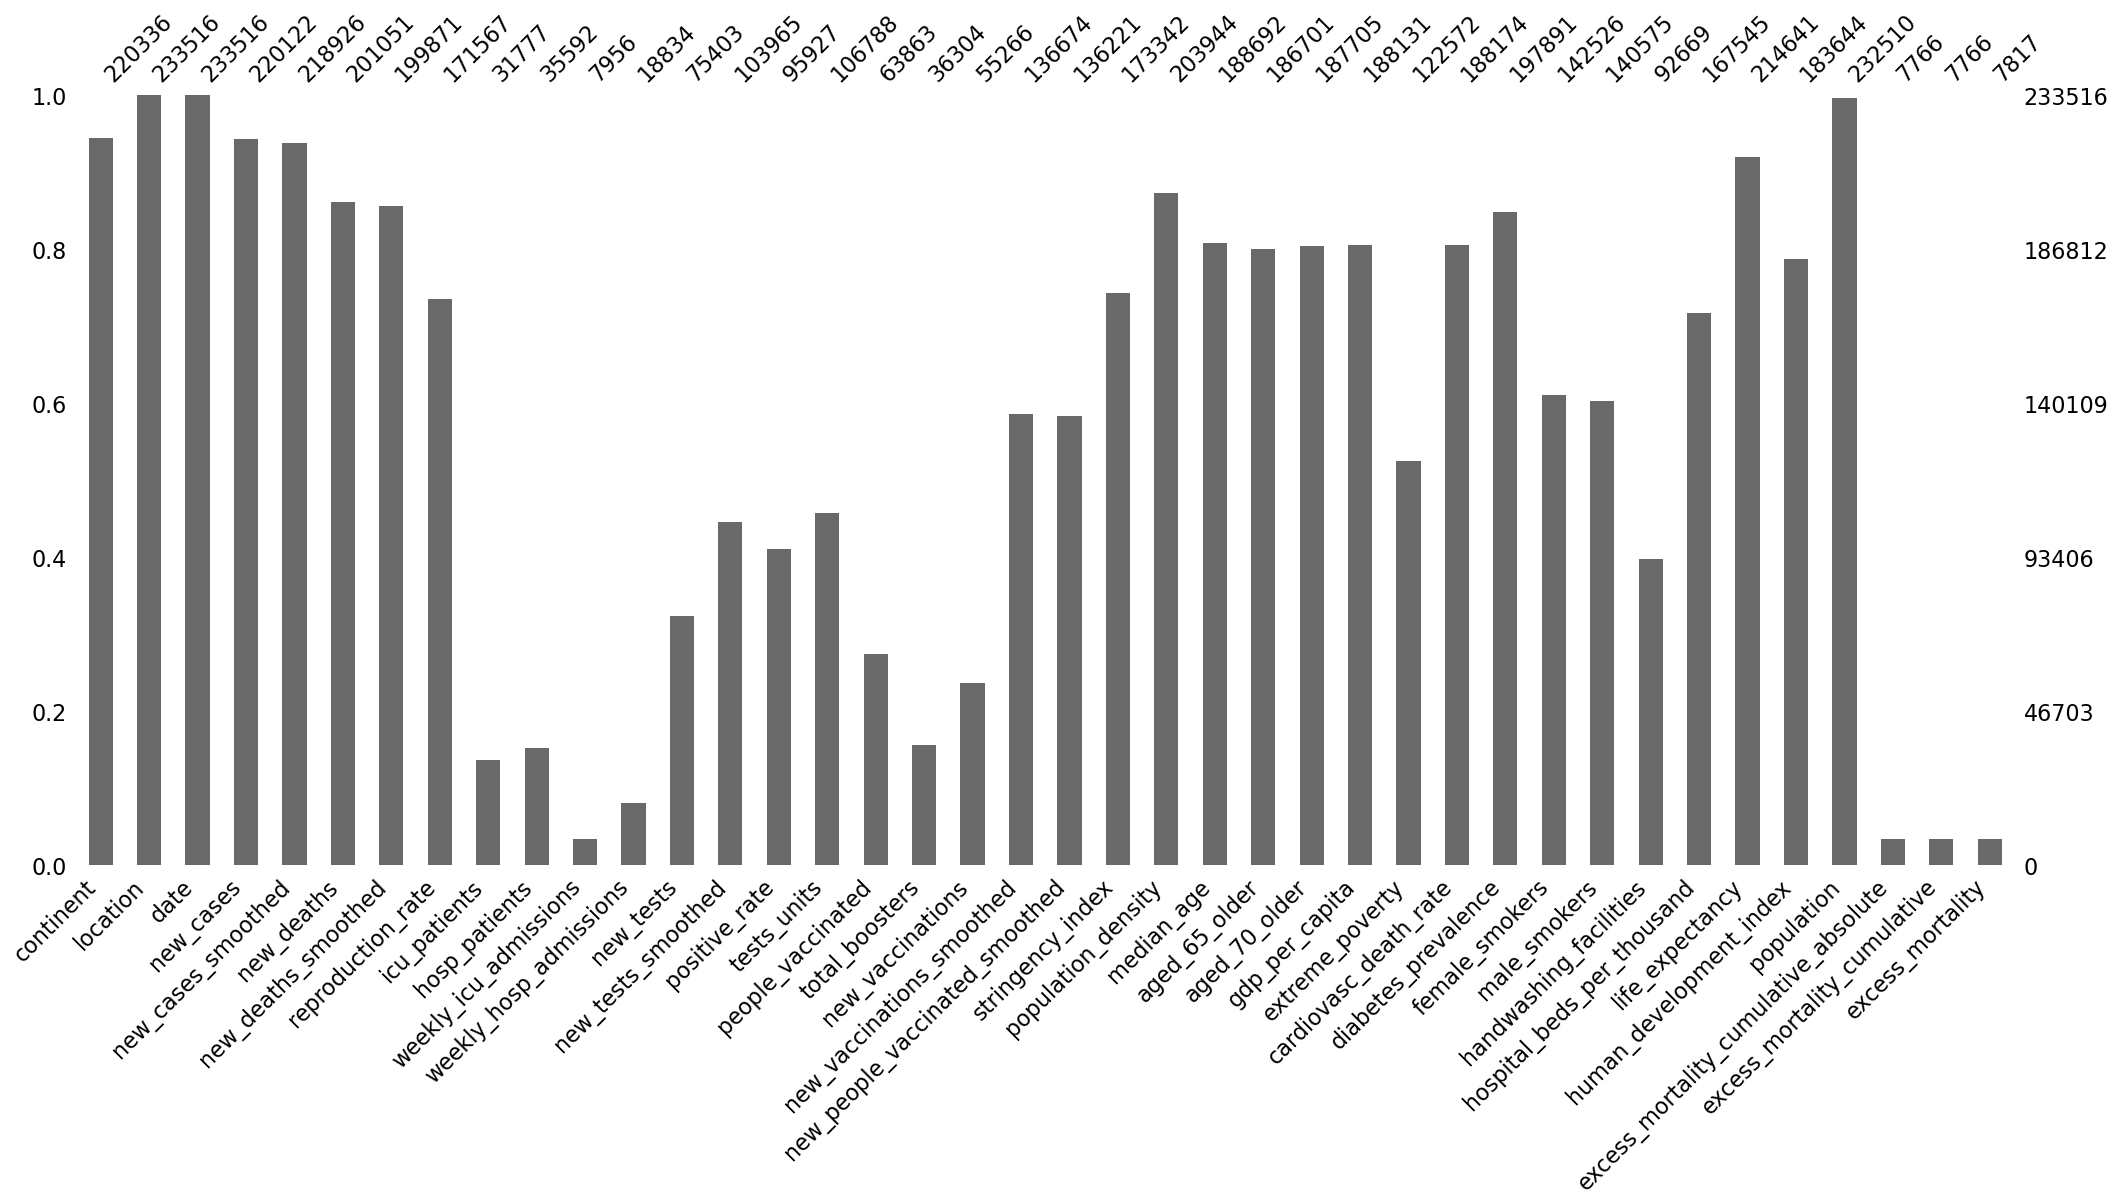

In [9]:
#visualizing missing data
import missingno as msno
msno.bar(df2)

In [10]:
#filling all missing numeric values with zeroes
num_col_list = ["new_cases", "new_cases_smoothed", "new_deaths", "new_deaths_smoothed", "reproduction_rate",
"icu_patients", "hosp_patients", "weekly_icu_admissions", "weekly_hosp_admissions", "new_tests", "new_tests_smoothed", "positive_rate",
"tests_units", "people_vaccinated", "total_boosters", "new_vaccinations", "new_vaccinations_smoothed", "new_people_vaccinated_smoothed",
"stringency_index", "population", "population_density", "median_age", "aged_65_older", "aged_70_older", "gdp_per_capita",
"extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers", "handwashing_facilities", 
"hospital_beds_per_thousand", "life_expectancy", "human_development_index", "excess_mortality_cumulative_absolute", 
"excess_mortality_cumulative", "excess_mortality"]

for col in num_col_list:
    df2[col].fillna(value=0, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233516 entries, 0 to 233515
Data columns (total 40 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   continent                             220336 non-null  object 
 1   location                              233516 non-null  object 
 2   date                                  233516 non-null  object 
 3   new_cases                             233516 non-null  float64
 4   new_cases_smoothed                    233516 non-null  float64
 5   new_deaths                            233516 non-null  float64
 6   new_deaths_smoothed                   233516 non-null  float64
 7   reproduction_rate                     233516 non-null  float64
 8   icu_patients                          233516 non-null  float64
 9   hosp_patients                         233516 non-null  float64
 10  weekly_icu_admissions                 233516 non-null  float64
 11  

In [11]:
#investigating wich countries(location) do not have continent values
no_continent_df = df2.loc[df2["continent"].isnull()]

no_continent_df["location"].value_counts()

Asia                   1022
High income            1022
Lower middle income    1022
North America          1022
Upper middle income    1022
World                  1022
Europe                 1021
European Union         1021
Oceania                1019
International          1006
Africa                 1000
South America           991
Low income              990
Name: location, dtype: int64

In [12]:
#renaming location column to Country
df2.rename(columns = {"location" : "Country"}, inplace=True)

These are not countries and therefore they will duplicate data. We will drop the values row-wise.

In [13]:
df3 = df2.dropna(axis=0)
df3.shape

(220336, 40)

In [14]:
#checking if there is still any missing values
df3.isnull().sum()

continent                               0
Country                                 0
date                                    0
new_cases                               0
new_cases_smoothed                      0
new_deaths                              0
new_deaths_smoothed                     0
reproduction_rate                       0
icu_patients                            0
hosp_patients                           0
weekly_icu_admissions                   0
weekly_hosp_admissions                  0
new_tests                               0
new_tests_smoothed                      0
positive_rate                           0
tests_units                             0
people_vaccinated                       0
total_boosters                          0
new_vaccinations                        0
new_vaccinations_smoothed               0
new_people_vaccinated_smoothed          0
stringency_index                        0
population_density                      0
median_age                        

<AxesSubplot:>

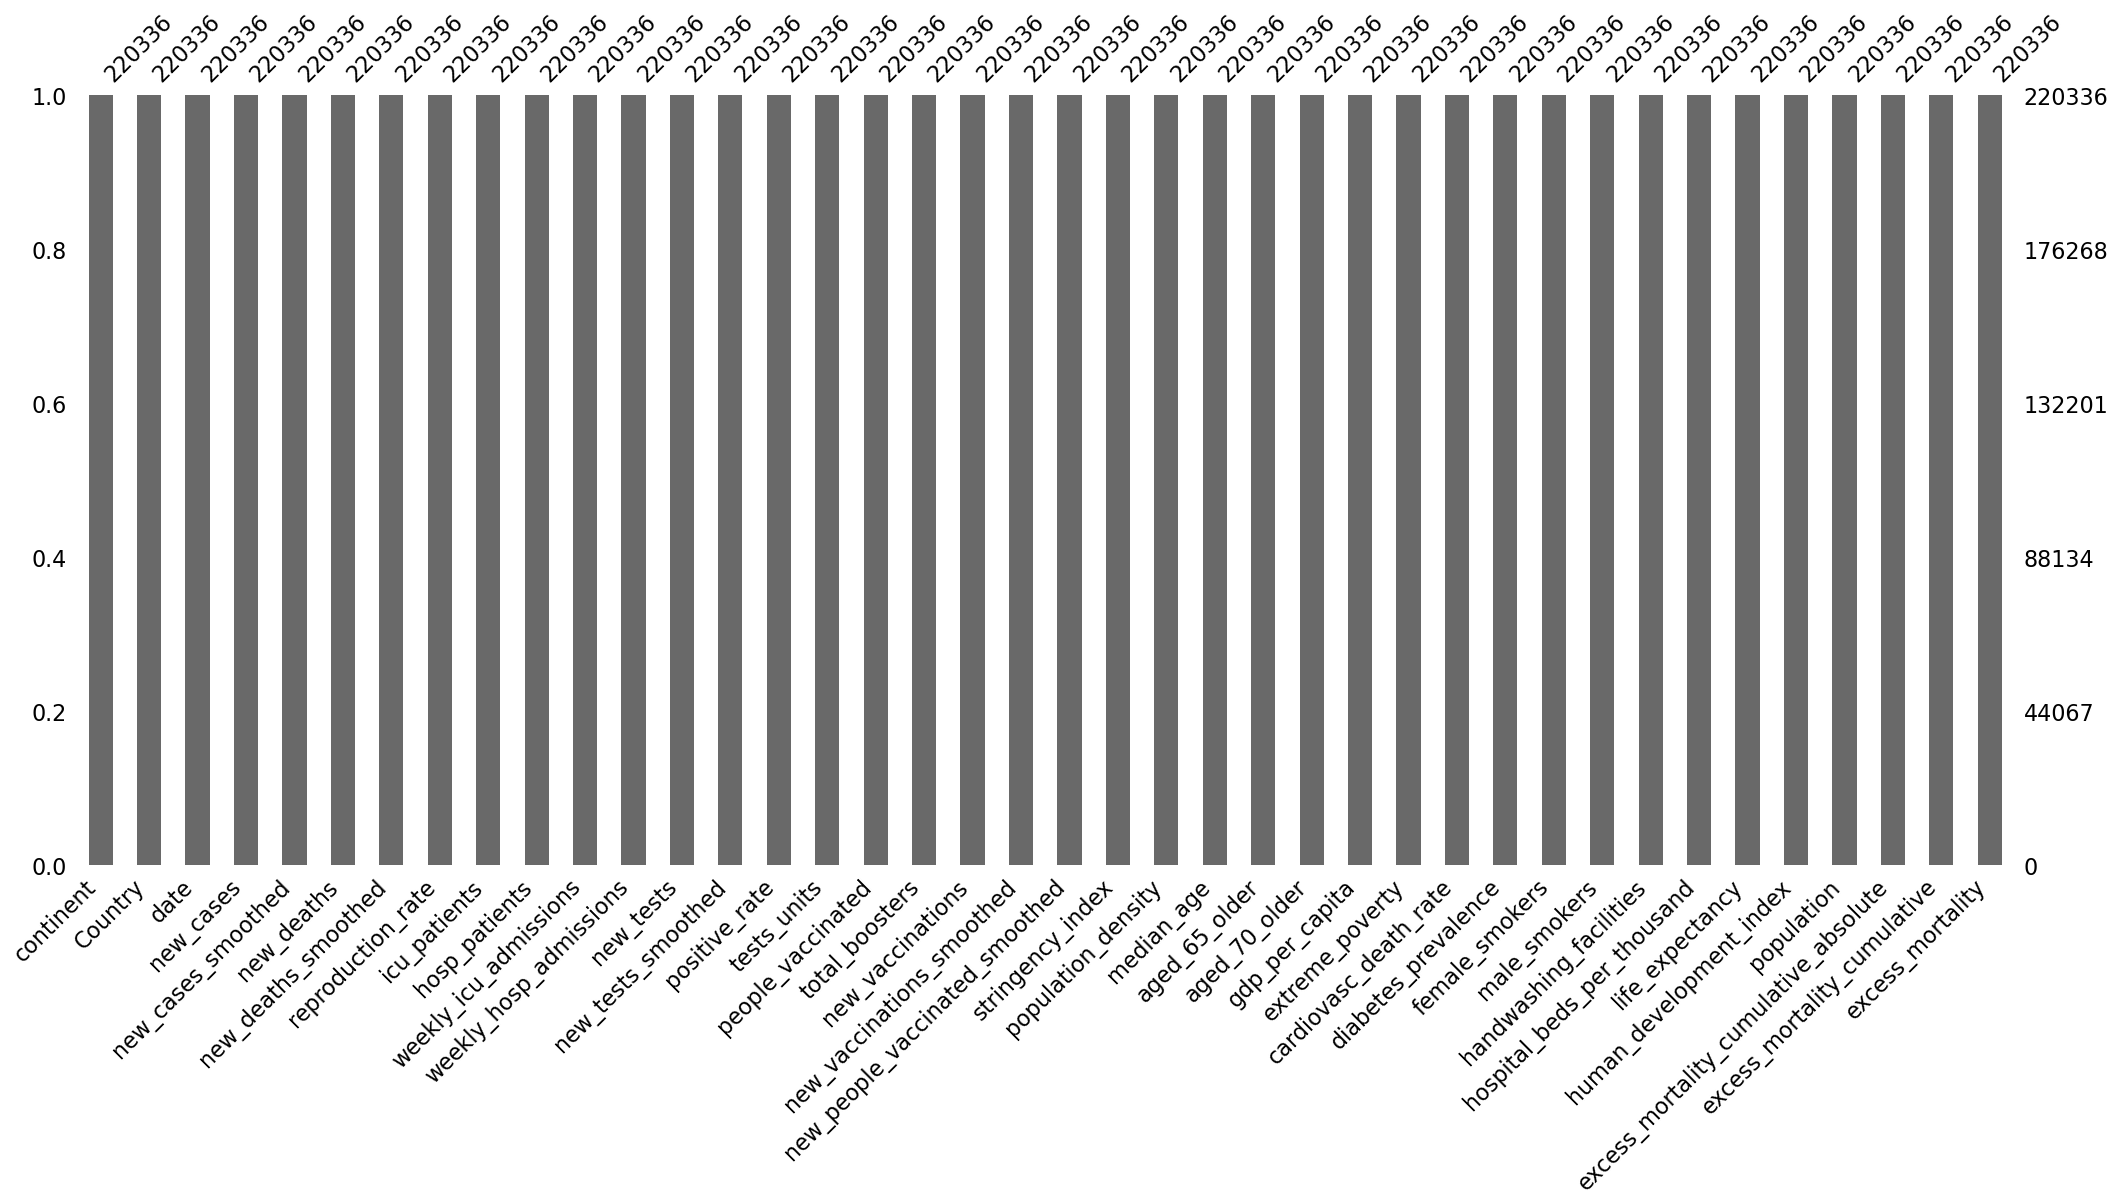

In [15]:
msno.bar(df3)

There are no more missing values, therefore we can save this dataframe to a csv file


In [16]:
df3.head(10)

,continent,Country,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,hosp_patients,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
0,Asia,Afghanistan,2020-02-24,5.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0
1,Asia,Afghanistan,2020-02-25,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0
2,Asia,Afghanistan,2020-02-26,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0
3,Asia,Afghanistan,2020-02-27,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0
4,Asia,Afghanistan,2020-02-28,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0
5,Asia,Afghanistan,2020-02-29,0.0,0.714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0
6,Asia,Afghanistan,2020-03-01,0.0,0.714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0
7,Asia,Afghanistan,2020-03-02,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0
8,Asia,Afghanistan,2020-03-03,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0
9,Asia,Afghanistan,2020-03-04,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0


In [17]:
#Saving the dataframe as a csv output file
output = df3
output.to_csv('./clean_covid_data.csv', index=False)